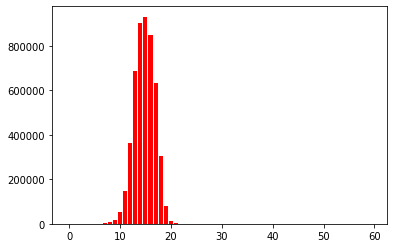

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

DAYS = 60
POPULATION = 1000000
SPREAD_FACTOR = 2
DAYS_TO_RECOVER = 5
INITIALLY_AFFECTED = 1


city = pd.DataFrame(data={'id': np.arange(POPULATION), 'infected': False, 'recovery_day': None, 'recovered': False})
city = city.set_index('id')


firstCases = city.sample(INITIALLY_AFFECTED, replace=False)
city.loc[firstCases.index, 'infected'] = True
city.loc[firstCases.index, 'recovery_day'] = DAYS_TO_RECOVER


stat_active_cases = [INITIALLY_AFFECTED]
stat_recovered = [0]

for today in range(1, DAYS):
    # Mark people who have recovered today
    city.loc[city['recovery_day'] == today, 'recovered'] = True
    city.loc[city['recovery_day'] == today, 'infected'] = False
    
    # Calcuate the number of people who are infected today
    spreadingPeople = city[ (city['infected'] == True)]
    totalCasesToday = round(len(spreadingPeople) * SPREAD_FACTOR)
    casesToday = city.sample(totalCasesToday, replace=True)
    
    # Ignore people who were already infected in casesToday
    casesToday = casesToday[ (casesToday['infected'] == False) & (casesToday['recovered'] == False) ]
    
    # Mark the new cases as infected, and their recovery day
    city.loc[casesToday.index, 'infected'] = True
    city.loc[casesToday.index, 'recovery_day'] = today + DAYS_TO_RECOVER

    stat_active_cases.append(len(city[city['infected'] == True]))
    # stat_recovered.append(len(city[city['recovered'] == True]))
    
    # Try and reduce the SPREAD_FACTOR to simulate the effects of different levels of social distancing
    # if today >= 5:
    #     SPREAD_FACTOR = 1
    # if today >= 10:
    #     SPREAD_FACTOR = 0.1
    
# import matplotlib.pyplot as plt
plt.bar(x=np.arange(DAYS), height=stat_active_cases, color="red")
plt.show()
